<a href="https://colab.research.google.com/github/hayatrajani/reinforcement-learning/blob/main/Gambler's_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required Modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Design the Problem

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, or loses by running out of money. On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite MDP.

The state is the gambler’s capital, S ∈ \{1, 2, . . . , 99\}.

The actions are stakes, A ∈ \{0, 1, . . . , min(s, 100−s)\}.

The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.

The state-value function then gives the probability of winning from each state.

A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal.

Let $p_h$ denote the probability of the coin coming up heads. If $p_h$ is known, then the entire problem is known and it can be solved, for instance, by value iteration.

In [ ]:
goal = 100
states = range(1, goal+1)
actions = np.empty(goal+1,dtype=list)
for s in states:
    actions[s] = range(1, min(s, goal-s)+1)
rewards = np.zeros(goal+1)
rewards[goal] = 1


def initPolicy():
    # Choose a random action
    action_prob = np.zeros((goal+1,goal+1))
    for s in states:
        possibleActions = actions[s]
        nActions = len(possibleActions)
        action_prob[s][possibleActions] = 1/nActions if nActions !=0 else 0
    return action_prob


def step(state, action):
    # new capital = old capital + stake, if win
    s_ = state + action
    # new capital = old capital - stake, if lose
    s__ = state - action
    # return new capital, win/lose probability, reward
    return ((s_, pWin, rewards[s_]), (s__, 1-pWin, rewards[s__]))


def policyEvaluation(policy, V = np.zeros(goal+1), gamma=1, theta=1e-4):
    # repeat
    while True:
        delta = 0
        # for each state s
        for s in states:
            # update the state value via a full width one step look ahead backup
            v = 0
            action_prob = policy[s]
            # for each possible action from state s
            for a in actions[s]:
                # for each possible successor state resulting from action a
                for s_, trans_prob, reward in step(s, a):
                    # sum up the immediate rewards and discounted successor state values
                    # weighted by the respective transition and action probabilities
                    v += action_prob[a]*trans_prob*(reward + gamma*V[s_])
            # get the maximum difference in state values
            delta = max(delta, abs(V[s]-v))
            V[s] = v
        # until maximum change in state values goes below threshold
        if delta < theta:
            break
    return V


def lookahead(s, V, gamma=1):    
    Q = np.zeros(len(actions[s])+1)
    # for each possible action from state s
    for a in actions[s]:
        # for each possible successor state resulting from action a
        for s_, trans_prob, reward in step(s, a):
            # estimate the expected value
            Q[a] += trans_prob*(reward + gamma*V[s_])
    return Q


def policyIteration(gamma=1):
    policy = initPolicy()
    V = np.zeros(goal+1)
    # repeat
    while True:
        # policy evaluation
        V = policyEvaluation(policy, V)
        # policy improvement
        policy_stable = True
        # for each state s
        for s in states:
            # get the best action as per current policy
            aOld = np.argmax(policy[s])
            # estimate action values for all possible actions from state s
            Q = lookahead(s, V, gamma)
            # get the new best action(s)
            aNew = np.argmax(Q)
            # greedily update the policy
            if not aOld == aNew:
                policy_stable = False
            policy[s] = np.eye(goal+1)[aNew]
        # until policy converges
        if policy_stable:
            return V, policy


def valueIteration(gamma=1, theta=1e-4):
    V = np.zeros(goal+1)
    # repeat
    while True:
        delta = 0
        # for each state s
        for s in states:
            # estimate action values for all possible actions from state s
            Q = lookahead(s, V, gamma)
            # max over the estimated action values
            v = np.max(Q)
            # get the maximum difference in state values
            delta = max(delta, abs(V[s]-v))
            V[s] = v
        # until maximum change in state value goes below threshold
        if delta < theta:
            break
    # policy update
    policy = np.zeros((goal+1, goal+1))
    for s in states:
        # estimate action values for all possible actions from state s
        Q = lookahead(s, V, gamma)
        # greedily update the policy
        policy[s][np.argmax(Q)] = 1
    return V, policy


def plotPolicy(policy, title):
    _ = plt.rc('figure', figsize=(12,6))
    _ = plt.rc('axes', titlesize=18)
    _ = plt.rc('axes', labelsize=16)
    _ = plt.rc('xtick', labelsize=14)
    _ = plt.rc('ytick', labelsize=14)
    plt.title('Learned Policy - '+title)
    plt.xlabel('Capital')
    plt.ylabel('Stake')
    plt.plot(states,np.nonzero(policy)[1])
    plt.show()

# Task 1

Solve the problem for $p_h=0.25$ using policy iteration and value iteration.

Show the results graphically.

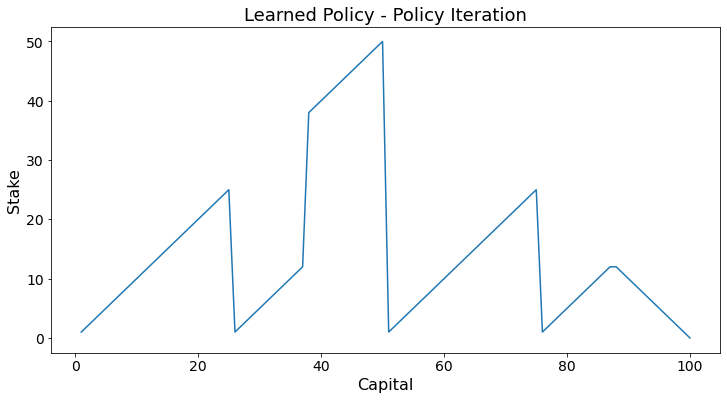

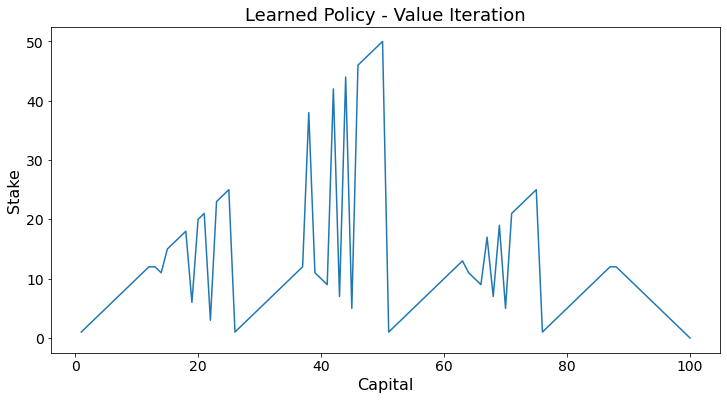

In [ ]:
pWin = 0.25

V, policy = policyIteration()
plotPolicy(policy, 'Policy Iteration')

V, policy = valueIteration()
plotPolicy(policy, 'Value Iteration')

# Task 2

Solve the problem for $p_h=0.55$ using policy iteration and value iteration.

Show the results graphically.

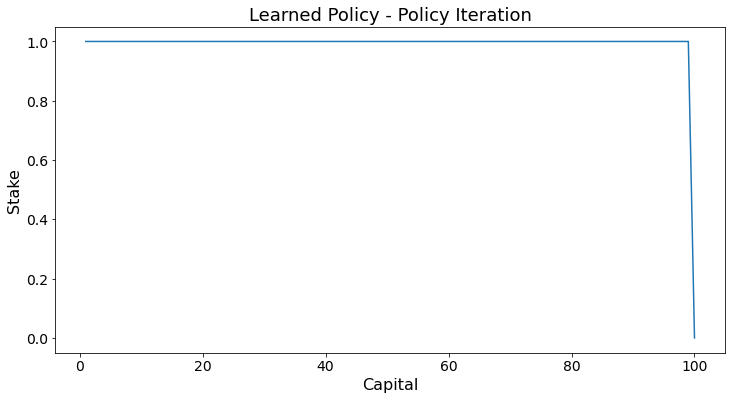

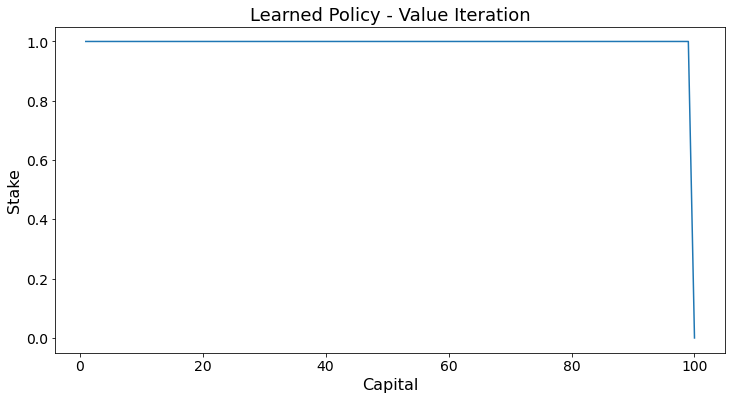

In [ ]:
pWin = 0.55

V, policy = policyIteration()
plotPolicy(policy, 'Policy Iteration')

V, policy = valueIteration()
plotPolicy(policy, 'Value Iteration')